##MOVIE RATING PREDICTION WITH PYTHON


This project utilizes the Titanic dataset to predict whether a passenger survived the sinking of the RMS Titanic, a classic beginner’s machine learning problem. The dataset includes various features such as passenger class, age, gender, fare, cabin, and embarkation port, which are used to train models to predict survival. By processing and analyzing these features, we can explore data cleaning techniques, handle missing values, and apply different machine learning algorithms like decision trees and logistic regression to make survival predictions. This project is an ideal way to learn fundamental data science and machine learning skills while tackling a real-world problem

#1. Importing the library files

In [365]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import os

# 2. Reading the IMDB Movies Dataset

In [366]:
import chardet

with open('IMDb-Movies-India.csv', 'rb') as f:
    result = chardet.detect(f.read())

# Use the detected encoding here
data = pd.read_csv('IMDb-Movies-India.csv', encoding=result['encoding'])

In [367]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


#First 5 rows of the dataset

In [368]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


#Last 5 rows of the dataset

In [369]:
data.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


#Thorough exploration of the dataset
Vewing the Columns in the dataset

In [370]:
col = data.columns
print(col)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


Shape of the dataset


In [371]:
print(data.shape)

(15509, 10)


#3. Preprocessing

In [372]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


Checking for missing data before preprocessing


In [373]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64


##Removing the columns from Dataset that has less values

In [374]:
threshold = 50
columns_to_drop = missing_percentage[missing_percentage > threshold].index
data.drop(columns=columns_to_drop, inplace=True)
print(f"Dropped columns: {columns_to_drop}")

Dropped columns: Index(['Duration'], dtype='object')


# Replace missing values by using appropriate techniques


In [375]:
data['Year'] = data['Year'].astype(str).str.replace(r'[^0-9]', '', regex=True)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data['Year'] = data['Year'].fillna(0).astype(int)


In [376]:
# Handle missing values in 'Rating'
data['Rating'] = data['Rating'].fillna(0)

# Clean and convert 'Votes' column
data['Votes'] = data['Votes'].astype(str).str.replace(',', '', regex=True)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce').fillna(0)


In [377]:
numerical_columns = ['Year', 'Votes', 'Rating']

for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col] = data[col].fillna(data[col].median())  # Direct assignment

# Check for remaining NaNs in numerical columns
print("Remaining NaNs in numerical columns:")
print(data[numerical_columns].isnull().sum())


Remaining NaNs in numerical columns:
Year      0
Votes     0
Rating    0
dtype: int64


In [378]:
q1 = np.percentile(data['Votes'], 25)
q3 = np.percentile(data['Votes'], 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['Votes'] >= lower_bound) & (data['Votes'] <= upper_bound)]

In [379]:
# Fill missing values in categorical columns
categorical_columns = ['Genre', 'Actor 1', 'Actor 2', 'Actor 3', 'Director']
data.loc[:, categorical_columns] = data.loc[:, categorical_columns].fillna('Unknown')

# Replace less frequent categories with 'Other'
top_n = 20
for col in categorical_columns:
    top_categories = data[col].value_counts().nlargest(top_n).index
    data.loc[:, col] = data[col].apply(lambda x: x if x in top_categories else 'Other')

# Create new features
data.loc[:, 'Director_Avg_Rating'] = data.groupby('Director')['Rating'].transform('mean')
data.loc[:, 'Actor_1_Popularity'] = data.groupby('Actor 1')['Actor 1'].transform('count')

# Handle missing values in new features
data.loc[:, 'Director_Avg_Rating'] = data['Director_Avg_Rating'].fillna(data['Director_Avg_Rating'].median())
data.loc[:, 'Actor_1_Popularity'] = data['Actor_1_Popularity'].fillna(data['Actor_1_Popularity'].median())


<ipython-input-379-d51662b4cc32>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Director_Avg_Rating'] = data.groupby('Director')['Rating'].transform('mean')
<ipython-input-379-d51662b4cc32>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'Actor_1_Popularity'] = data.groupby('Actor 1')['Actor 1'].transform('count')




# Plotting the relationships between features and target

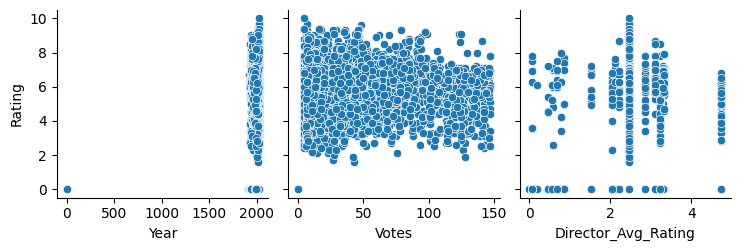

In [380]:
sns.pairplot(data, x_vars=['Year', 'Votes', 'Director_Avg_Rating'], y_vars='Rating', kind='scatter')
plt.show()

In [381]:
data.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Director_Avg_Rating,Actor_1_Popularity
0,,0,Drama,0.0,0.0,Other,Other,Birbal,Other,2.460967,9724
1,#Gadhvi (He thought he was Gandhi),2019,Drama,7.0,8.0,Other,Other,Other,Other,2.460967,9724
2,#Homecoming,2021,Other,0.0,0.0,Other,Other,Other,Other,2.460967,9724
3,#Yaaram,2019,Other,4.4,35.0,Other,Other,Other,Other,2.460967,9724
4,...And Once Again,2010,Drama,0.0,0.0,Other,Other,Other,Other,2.460967,9724


#Converting Characters into Numerical data

In [382]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['Name', 'Year', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Director_Avg_Rating', 'Actor_1_Popularity']

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

print(data[categorical_columns].head())

   Name  Year  Genre  Rating  Votes  Director  Actor 1  Actor 2  Actor 3  \
0     0     0     10       0      0        17       12        1       13   
1     1    99     10      54      4        17       12       12       13   
2     2   101     17       0      0        17       12       12       13   
3     3    99     17      28     31        17       12       12       13   
4     7    90     10       0      0        17       12       12       13   

   Director_Avg_Rating  Actor_1_Popularity  
0                   13                  18  
1                   13                  18  
2                   13                  18  
3                   13                  18  
4                   13                  18  


<ipython-input-382-6641501f565e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col])
<ipython-input-382-6641501f565e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = label_encoder.fit_transform(data[col])
<ipython-input-382-6641501f565e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

#Heatmap for Correlation:

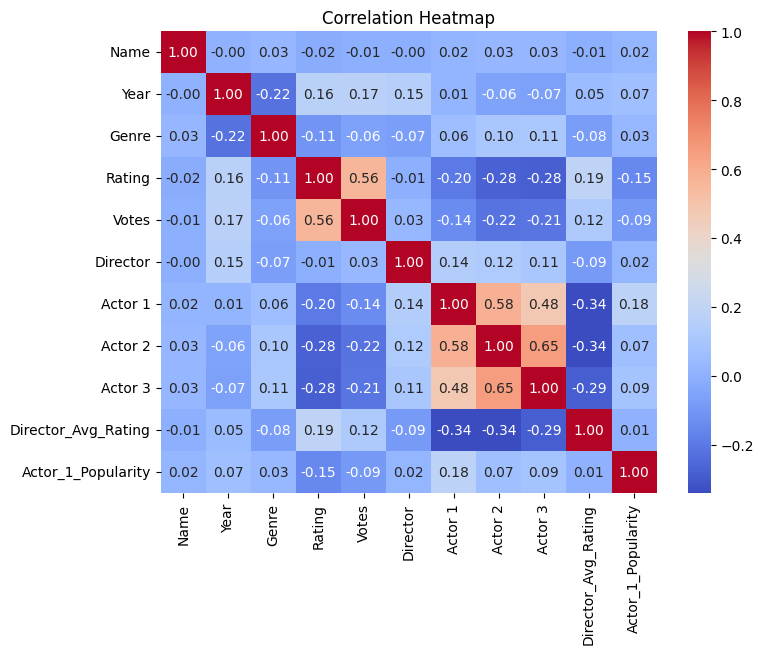

In [383]:
# Convert all columns to numeric where possible
data = data.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the median (or choose any other method)
data.fillna(data.median(), inplace=True)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize= (8, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Checking for missing data after preprocessing


In [384]:
data.isnull().sum()

,0
Name,0
Year,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0
Director_Avg_Rating,0


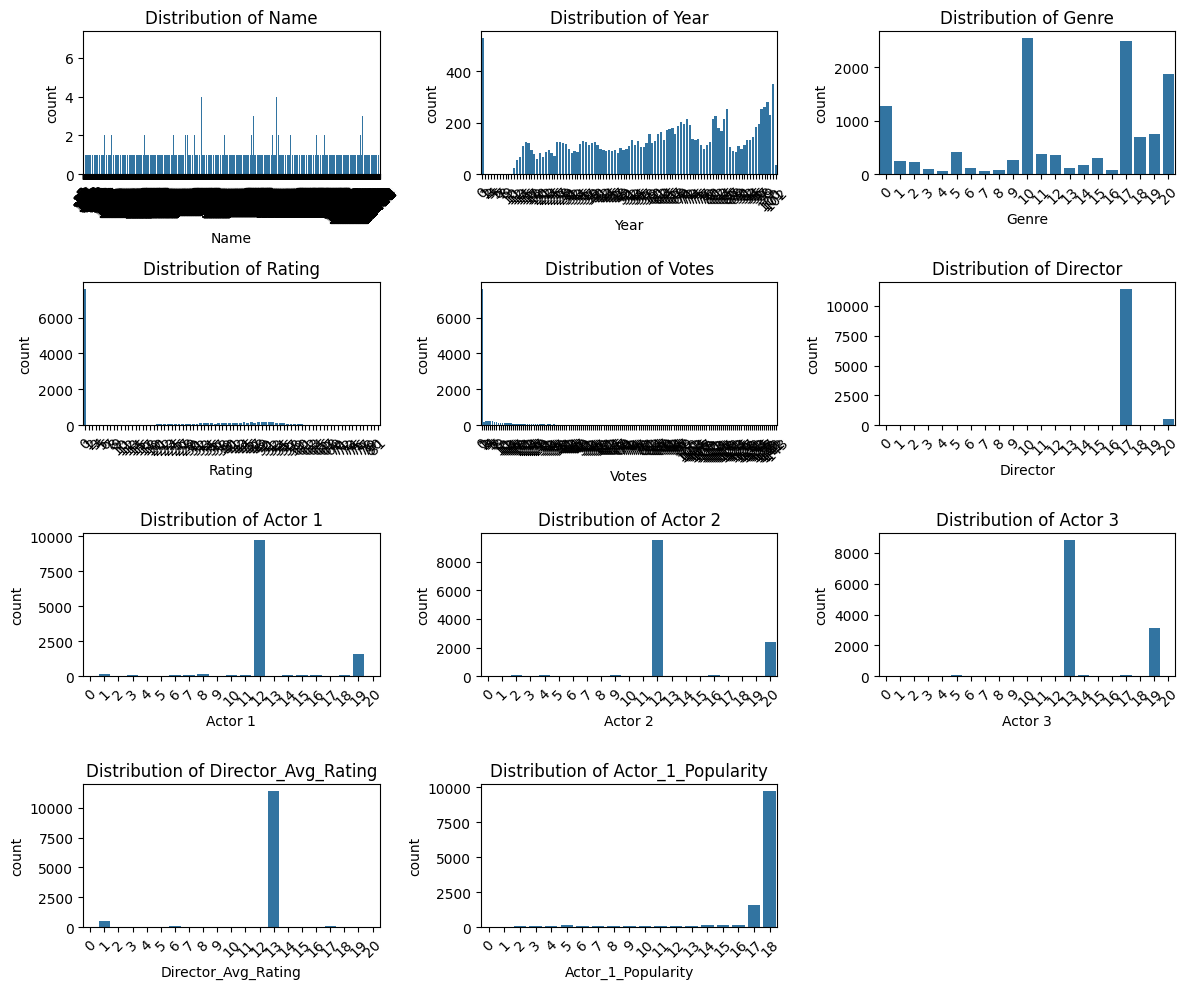

In [385]:
categorical_features = ['Name', 'Year', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Director_Avg_Rating', 'Actor_1_Popularity']

plt.figure(figsize=(12, 10))
num_features = len(categorical_features)
rows = (num_features // 3) + (num_features % 3 > 0)

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [386]:

data = data.apply(pd.to_numeric, errors='coerce')

data.fillna(data.median(), inplace=True)


# Display the updated DataFrame

In [387]:
col = data.columns
print(col)

Index(['Name', 'Year', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Director_Avg_Rating', 'Actor_1_Popularity'],
      dtype='object')


In [388]:
data.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Director_Avg_Rating,Actor_1_Popularity
0,0,0,10,0,0,17,12,1,13,13,18
1,1,99,10,54,4,17,12,12,13,13,18
2,2,101,17,0,0,17,12,12,13,13,18
3,3,99,17,28,31,17,12,12,13,13,18
4,7,90,10,0,0,17,12,12,13,13,18


#Distributing the Ratings

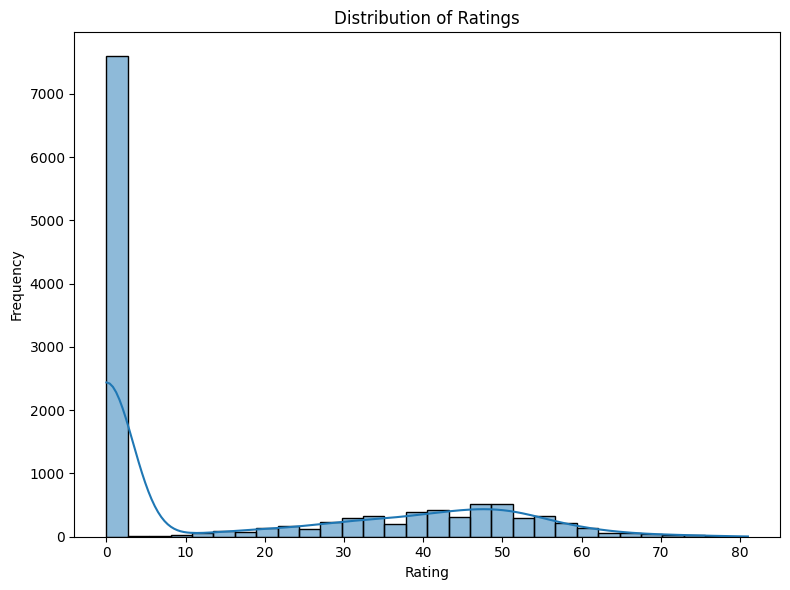

In [389]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], kde=True, bins=30)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


#Boxplot of Ratings

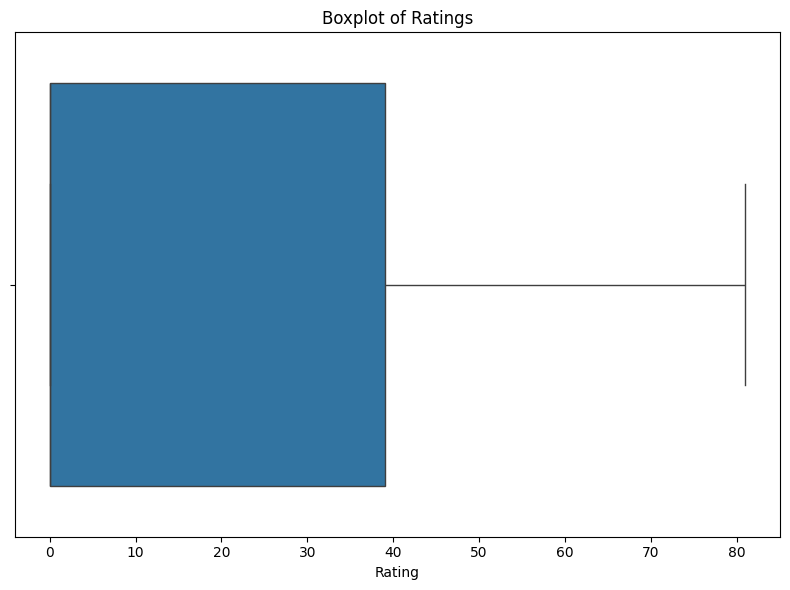

In [390]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Rating'])
plt.title('Boxplot of Ratings')
plt.tight_layout()
plt.show()


In [391]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Year', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3',
                       'Director_Avg_Rating', 'Actor_1_Popularity']

label_encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

print(data[categorical_columns].head())


   Year  Genre  Votes  Director  Actor 1  Actor 2  Actor 3  \
0     0     10      0        17       12        1       13   
1    99     10      4        17       12       12       13   
2   101     17      0        17       12       12       13   
3    99     17     31        17       12       12       13   
4    90     10      0        17       12       12       13   

   Director_Avg_Rating  Actor_1_Popularity  
0                   13                  18  
1                   13                  18  
2                   13                  18  
3                   13                  18  
4                   13                  18  


#4. Splitting the data

In [392]:
X = data[
['Year', 'Genre', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Director_Avg_Rating', 'Actor_1_Popularity']
          ]
y = data['Rating']


# Print the shapes of X and y to confirm the split

In [393]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (12688, 9)
y shape: (12688,)


In [394]:
X

,Year,Genre,Votes,Director,Actor 1,Actor 2,Actor 3,Director_Avg_Rating,Actor_1_Popularity
0,0,10,0,17,12,1,13,13,18
1,99,10,4,17,12,12,13,13,18
2,101,17,0,17,12,12,13,13,18
3,99,17,31,17,12,12,13,13,18
4,90,10,0,17,12,12,13,13,18
...,...,...,...,...,...,...,...,...,...
15503,69,1,40,17,12,12,13,13,18
15504,68,0,7,17,12,12,13,13,18
15506,85,0,0,17,12,20,19,13,18
15507,68,0,0,20,19,20,19,1,17


In [395]:
y

,Rating
0,0
1,54
2,0
3,28
4,0
...,...
15503,42
15504,30
15506,0
15507,0


#Splitting into Training and Testing sets

In [396]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values (fill NaN with mean)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Optional: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Now apply PCA
pca = PCA(n_components=0.80)  # Retain 80% of the variance
X_pca_reduced = pca.fit_transform(X_scaled)


In [397]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets


In [398]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training features shape: (10150, 6)
Testing features shape: (2538, 6)
Training labels shape: (10150,)
Testing labels shape: (2538,)


In [399]:
print("Original class distribution:", y_train.value_counts())

Original class distribution: Rating
0     6012
46     153
52     148
50     147
49     140
      ... 
79       1
4        1
6        1
81       1
2        1
Name: count, Length: 80, dtype: int64


#5. Building The Models

#A. Implimentation of Logistic Regression and analysing the perfomance

In [400]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred)
mse_lr = mean_squared_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)
y_test_binned_lr = np.digitize(y_test, bins=np.histogram_bin_edges(y_test, bins=5))
y_pred_binned_lr = np.digitize(y_pred, bins=np.histogram_bin_edges(y_test, bins=5))
conf_matrix_lr = confusion_matrix(y_test_binned_lr, y_pred_binned_lr)
print("Linear Regression Performance:")
print(f"MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}, R²: {r2_lr:.4f}")
print("Confusion Matrix:")
print(conf_matrix_lr)
print("=" * 50)

Linear Regression Performance:
MAE: 14.2772, MSE: 314.8028, R²: 0.3523
Confusion Matrix:
[[   0    0    0    0    0    0    0]
 [ 132 1099  356    5    3    2    0]
 [   1   26   90   33   16    4    0]
 [   1   87  216   82   33    3    0]
 [   0   65  147   67   28    4    0]
 [   0    6   20    7    4    0    0]
 [   0    0    1    0    0    0    0]]


#Visualise the Predictions

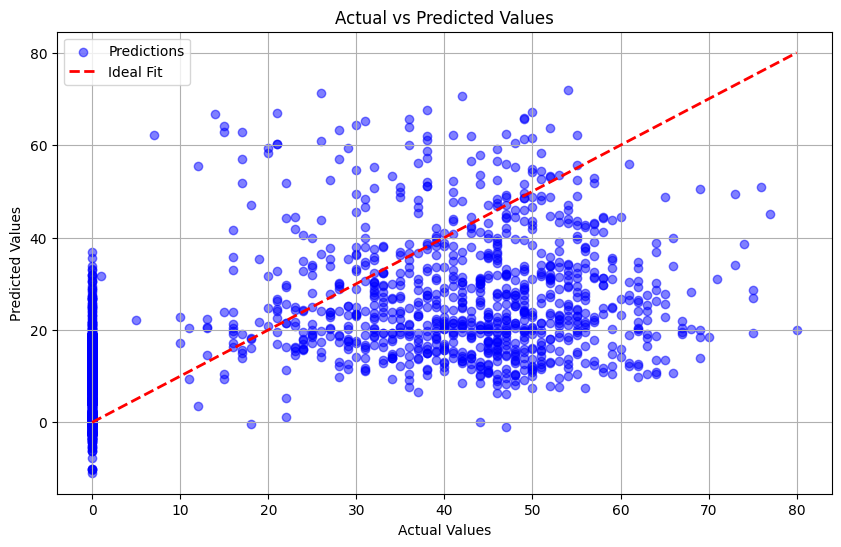

In [401]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2, label="Ideal Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


#B. Implimentation of RandomForest Regressor and analysing the perfomance

In [402]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training R²: {train_r2}')

y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test R²: {test_r2}')


Training R²: 0.9671820592100536
Test R²: 0.7970244582162311


In [403]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {scores}')
print(f'Mean R²: {scores.mean()}')

Cross-Validation R² Scores: [0.88586199 0.89027595 0.8790365  0.89113372 0.88571268]
Mean R²: 0.8864041672381069


#Visualise the Predictions

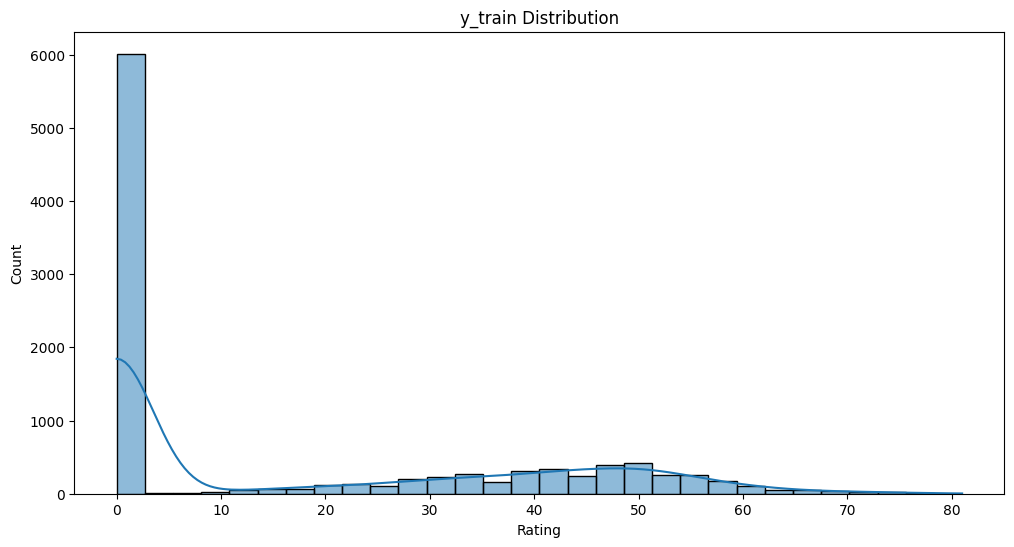

In [404]:
plt.figure(figsize=(12, 6))

sns.histplot(y_train, bins=30, kde=True)
plt.title('y_train Distribution')

plt.show()

#C. Implimentation of SVM Regression and analysing the perfomance

In [405]:
from sklearn.svm import SVR

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

y_svm_pred = svm_model.predict(X_test)

svm_mse = mean_squared_error(y_test, y_svm_pred)
svm_r2 = r2_score(y_test, y_svm_pred)
print(f"SVM - Mean Squared Error: {svm_mse}")
print(f"SVM - R-squared: {svm_r2}")

y_svm_train_pred = svm_model.predict(X_train)
train_r2_svm = r2_score(y_train, y_svm_train_pred)
print(f"SVM - Training R²: {train_r2_svm}")

SVM - Mean Squared Error: 273.13720913002925
SVM - R-squared: 0.4379966185395674
SVM - Training R²: 0.42776576261338517


In [406]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {scores}')
print(f'Mean R²: {scores.mean()}')

Cross-Validation R² Scores: [0.88586199 0.89027595 0.8790365  0.89113372 0.88571268]
Mean R²: 0.8864041672381069


#Visualise the Predictions

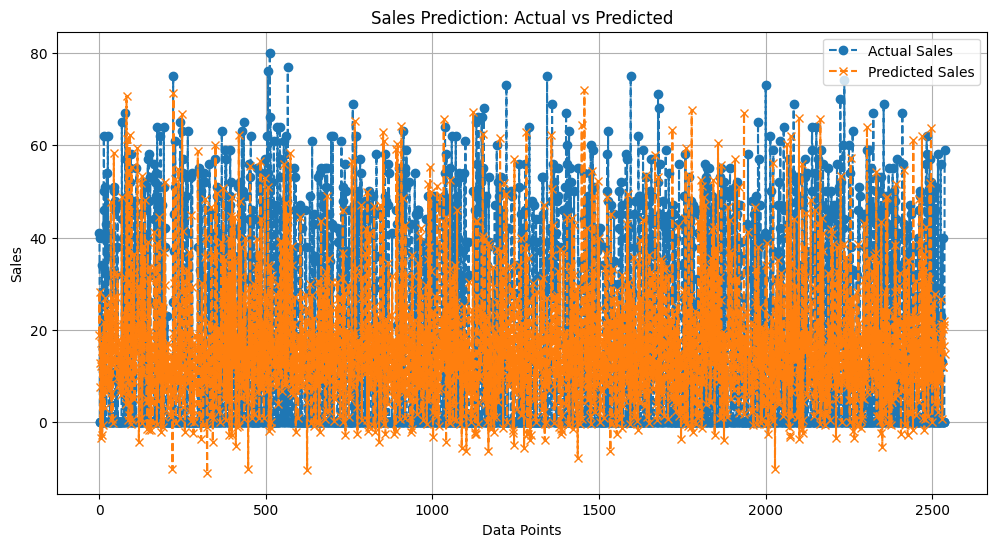

In [407]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Sales", marker='o', linestyle='dashed')
plt.plot(y_pred, label="Predicted Sales", marker='x', linestyle='dashed')
plt.xlabel("Data Points")
plt.ylabel("Sales")
plt.title("Sales Prediction: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()


#D. Implimentation of KNN Regression and analysing the perfomance

In [408]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Initialize KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_knn_pred = knn_model.predict(X_test)

# Evaluate performance
knn_mse = mean_squared_error(y_test, y_knn_pred)
knn_r2 = r2_score(y_test, y_knn_pred)
print(f"KNN - Mean Squared Error: {knn_mse}")
print(f"KNN - R-squared: {knn_r2}")

# Training R² Score
y_knn_train_pred = knn_model.predict(X_train)
train_r2_knn = r2_score(y_train, y_knn_train_pred)
print(f"KNN - Training R²: {train_r2_knn}")


KNN - Mean Squared Error: 132.8452009456265
KNN - R-squared: 0.7266595335727748
KNN - Training R²: 0.8194097839858023


In [409]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R² Scores: {scores}')
print(f'Mean R²: {scores.mean()}')

Cross-Validation R² Scores: [0.88586199 0.89027595 0.8790365  0.89113372 0.88571268]
Mean R²: 0.8864041672381069


#Visualise the Predictions

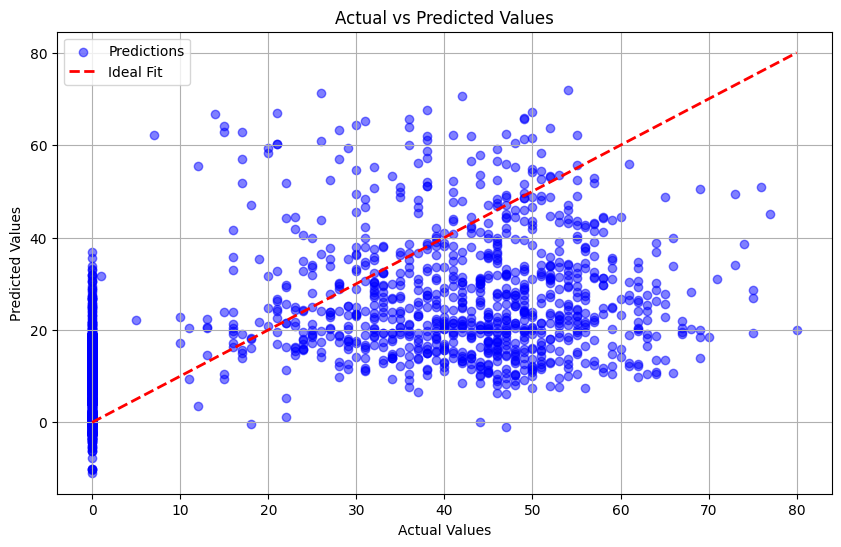

In [410]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', linewidth=2, label="Ideal Fit")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.grid(True)
plt.show()


#E. Implimentation of Decision Tree Regression and analysing the perfomance

In [411]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_dt_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, y_dt_pred)
dt_r2 = r2_score(y_test, y_dt_pred)
print(f"Decision Tree - Mean Suared Error: {dt_mse}")
print(f"Decision Tree - R-squared: {dt_r2}")

y_dt_train_pred = dt_model.predict(X_train)
train_r2_dt = r2_score(y_train, y_dt_train_pred)
print(f"Decision Tree - Training R²: {train_r2_dt}")

dt_cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='r2')
print(f"Decision Tree - Cross-Validation R² Scores: {dt_cv_scores}")
print(f"Decision Tree - Mean R²: {dt_cv_scores.mean()}")


Decision Tree - Mean Suared Error: 180.8802985728045
Decision Tree - R-squared: 0.6278231744357653
Decision Tree - Training R²: 0.9953806463253031
Decision Tree - Cross-Validation R² Scores: [0.80276745 0.80928752 0.7919666  0.82841412 0.80317491]
Decision Tree - Mean R²: 0.8071221193823824


In [412]:
# Train Decision Tree on Training Data
regressor_train = DecisionTreeRegressor(max_depth=3, random_state=1234)
regressor_train.fit(X_train, y_train)

# Train Decision Tree on Testing Data
regressor_test = DecisionTreeRegressor(max_depth=3, random_state=1234)
regressor_test.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=3, random_state=1234)

In [413]:
# Train Decision Tree on Training Data
regressor_train = DecisionTreeRegressor(max_depth=3, random_state=1234)
regressor_train.fit(X_train, y_train)

# Train Decision Tree on Testing Data
regressor_test = DecisionTreeRegressor(max_depth=3, random_state=1234)
regressor_test.fit(X_test, y_test)
# Predict
y_pred_train = regressor_train.predict(X_train)
y_pred_test = regressor_test.predict(X_test)


# Evaluation Metrics
def evaluate_model(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{label} Performance:")
    print(f"  - Mean Absolute Error (MAE): {mae}")
    print(f"  - Mean Squared Error (MSE): {mse}")
    print(f"  - R-squared Score (R²): {r2}")

evaluate_model(y_train, y_pred_train, "Training Data")
evaluate_model(y_test, y_pred_test, "Testing Data")


Training Data Performance:
  - Mean Absolute Error (MAE): 12.87754535596166
  - Mean Squared Error (MSE): 290.9677391367238
  - R-squared Score (R²): 0.4118496525513652

Testing Data Performance:
  - Mean Absolute Error (MAE): 13.480358646150682
  - Mean Squared Error (MSE): 307.631312072257
  - R-squared Score (R²): 0.3670220246505763


##Visualize the model


# Specify feature names as a list

In [414]:
print(np.unique(y_train))

[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 81]


#Training Data

In [415]:
text_train = export_text(regressor_train)
with open("decision_tree_regression_train.log", "w") as fout:
    fout.write(text_train)

print("\nTraining Data Decision Tree:\n", text_train)


Training Data Decision Tree:
 |--- feature_0 <= -0.55
|   |--- feature_3 <= -0.92
|   |   |--- feature_0 <= -0.71
|   |   |   |--- value: [22.45]
|   |   |--- feature_0 >  -0.71
|   |   |   |--- value: [6.21]
|   |--- feature_3 >  -0.92
|   |   |--- feature_4 <= 0.71
|   |   |   |--- value: [40.64]
|   |   |--- feature_4 >  0.71
|   |   |   |--- value: [18.31]
|--- feature_0 >  -0.55
|   |--- feature_3 <= 0.79
|   |   |--- feature_2 <= -1.54
|   |   |   |--- value: [30.85]
|   |   |--- feature_2 >  -1.54
|   |   |   |--- value: [7.53]
|   |--- feature_3 >  0.79
|   |   |--- feature_0 <= 3.52
|   |   |   |--- value: [46.30]
|   |   |--- feature_0 >  3.52
|   |   |   |--- value: [0.00]



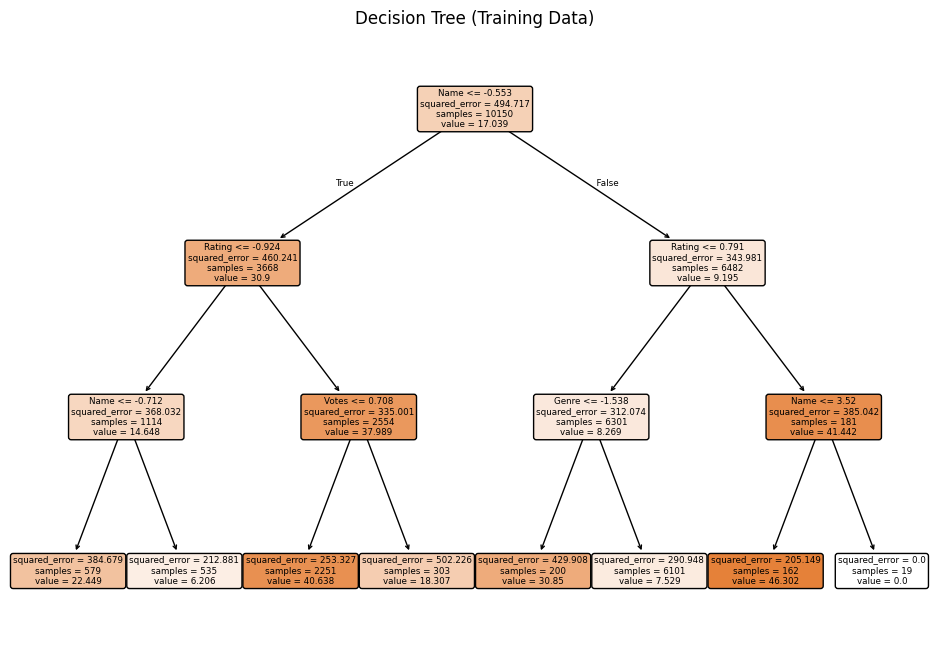

In [416]:
plt.figure(figsize=(12, 8))
plot_tree(regressor_train, feature_names=['Name', 'Year', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Director_Avg_Rating', 'Actor_1_Popularity'], filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree (Training Data)")
plt.savefig("decision_tree_test.png")
plt.show()


#Visualize the Decision Tree on Testing Data

In [417]:
text_test = export_text(regressor_test)
with open("decision_tree_regression_test.log", "w") as fout:
    fout.write(text_test)

print("\nTesting Data Decision Tree:\n", text_test)


Testing Data Decision Tree:
 |--- feature_0 <= -0.70
|   |--- feature_3 <= -0.31
|   |   |--- feature_3 <= -1.45
|   |   |   |--- value: [14.73]
|   |   |--- feature_3 >  -1.45
|   |   |   |--- value: [27.98]
|   |--- feature_3 >  -0.31
|   |   |--- feature_5 <= -0.64
|   |   |   |--- value: [24.49]
|   |   |--- feature_5 >  -0.64
|   |   |   |--- value: [43.64]
|--- feature_0 >  -0.70
|   |--- feature_3 <= 0.79
|   |   |--- feature_0 <= -0.42
|   |   |   |--- value: [15.82]
|   |   |--- feature_0 >  -0.42
|   |   |   |--- value: [6.11]
|   |--- feature_3 >  0.79
|   |   |--- feature_0 <= 3.48
|   |   |   |--- value: [44.06]
|   |   |--- feature_0 >  3.48
|   |   |   |--- value: [0.00]



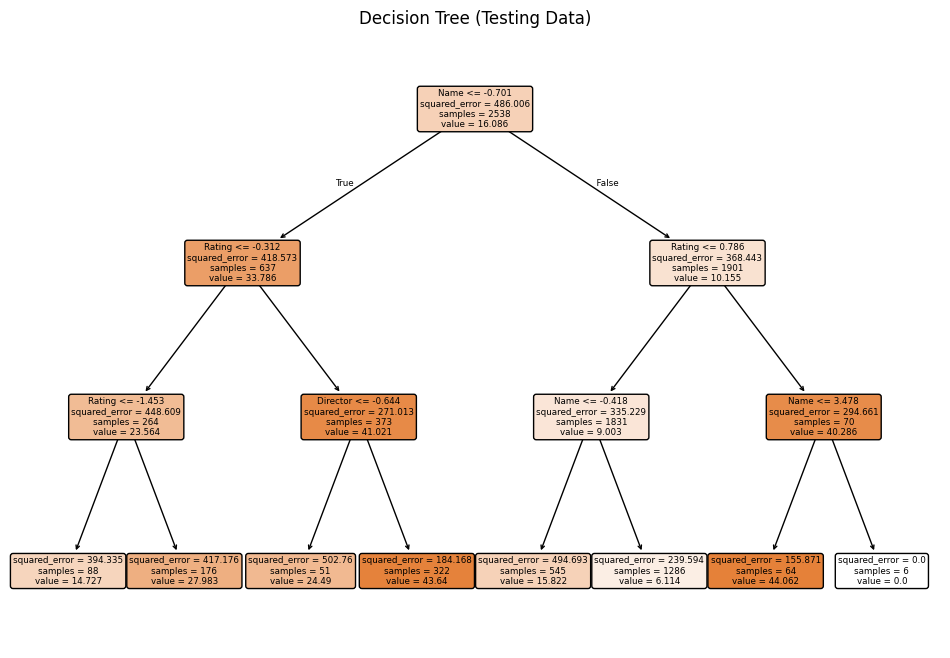

In [418]:
plt.figure(figsize=(12, 8))
plot_tree(regressor_test, feature_names=['Name', 'Year', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3', 'Director_Avg_Rating', 'Actor_1_Popularity'], filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree (Testing Data)")
plt.savefig("decision_tree_test.png")
plt.show()

##------------------------------------------------------------------  THE END  --------------------------------------------------------------------